# <center> Лабороторна робота 4 (частина 1) <center>

# <center> КІЛЬКІСНІ ПОКАЗНИКИ ХАОСУ <center>

### <center> ЗНАХОДЖЕННЯ ПОКАЗНИКА ЛЯПУНОВА ДЛЯ ДИСКРЕТНИХ НЕЛІНІЙНИХ СИСТЕМ <center>

In [1]:
# Імпорт біліотек
import numpy as np
import matplotlib.pyplot as plt
import math 
import sympy as sym
sym.init_printing()

## Завдання 1.

In [2]:
# 50 ітерацій: 
N = 50

In [3]:
# масиви для значень x[i], y[i]: 
x = np.zeros(N + 1)
y = np.zeros(N + 1)
z = np.zeros(N + 1)
z1 = np.zeros(N + 1)
delta = np.zeros(N + 1)
Dk = np.zeros(N + 1)

In [4]:
# фіксоване значення параметру r: 
r = 4

In [5]:
# початкові значення х0, у0: 
x[0] = 0.46
y[0] = x[0] + 0.000001
z[0] = np.log(abs(r-2*r*x[0]))
z1[0] = np.log(abs(r-2*r*y[0]))
delta[0] = abs(x[0] - y[0])
delta0 = 1*pow(10,-6)
Dk[0] = (np.log(delta[0]/delta0))/N

In [6]:
for k in range(N): 
    x[k+1] = r*x[k]*(1-x[k])
    y[k+1] = r*y[k]*(1-y[k]) 
    z[k+1] = np.log(abs(r-2*r*x[k+1]))
    z1[k+1] = np.log(abs(r-2*r*y[k+1]))
    delta[k+1] = abs(x[k+1] - y[k+1])
    Dk[k+1] = (np.log(delta[k+1]/delta0))/N

In [7]:
z_d = sym.Symbol('z')

In [8]:
sym.diff(r*z_d*(1-z_d), z_d)

In [9]:
def plotByK(k, x, y):
    plt.figure(figsize=(7, 5))
    plt.plot(k, x, color = 'red')
    plt.plot(k, y, color = 'green')
    plt.grid(True)
    plt.show()

In [10]:
k = np.array(range(0, N+1))

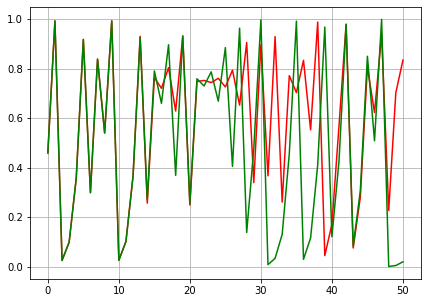

In [11]:
plotByK(k, x, y)

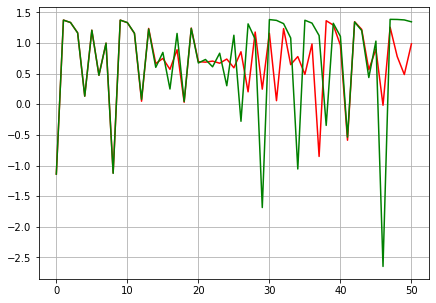

In [12]:
plotByK(k, z, z1)

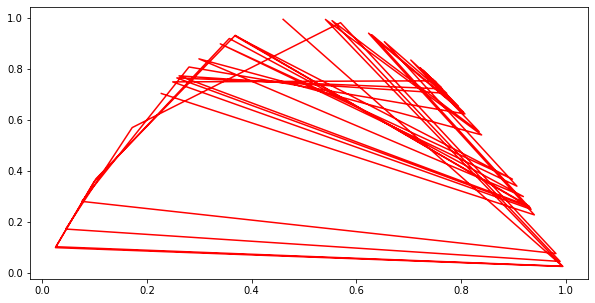

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(x[0:N-1], x[1:N], color = 'red')
plt.show()

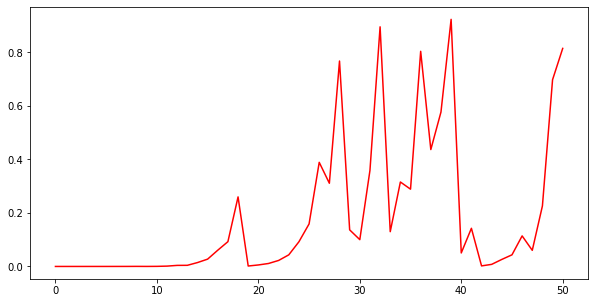

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(k, delta, color = 'red')
plt.show()

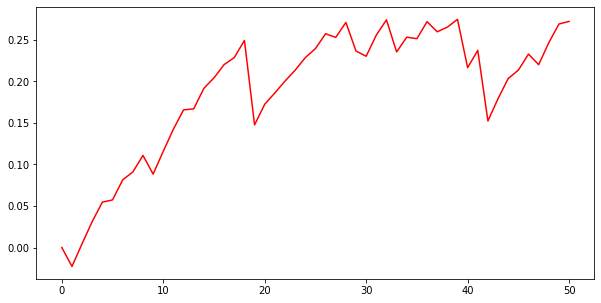

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(k, Dk, color = 'red')
plt.show()

## Завдання 2-3

In [16]:
def LYP_X(x0):
    r = 2.6
    N = 50
    x = np.zeros(N+1)
    z = np.zeros(N+1)
    x[0] = x0
    summ = 0
    for k in range(1, N+1): 
        x[k] = r*x[k-1]*(1-x[k-1])
        z[k] = np.log(abs(r-2*r*x[k]))
        summ += z[k]
    return round(summ/N, 3)

In [17]:
LYP_X(0.3)

In [18]:
def LYP_R(r):
    N = 50
    sum = 0
    x = np.zeros(N+1)
    z = np.zeros(N+1)
    x[0] = 0.3
    z[0] = np.log(abs(r-2*r*x[0]))
    for k in range(1, N+1): 
        x[k] = r*x[k-1]*(1-x[k-1])
        z[k] = np.log(abs(r-2*r*x[k]))
        sum += z[k]
    return round(sum/N, 3)

In [19]:
LYP_R(2.6)

## Завдання 4

In [20]:
def LYP_X_R(x0, r):
    N = 50
    x = np.zeros(N+1)
    z = np.zeros(N+1)
    x[0] = x0 
    sum = 0
    for k in range(1, N+1):  
        x[k] = r*x[k-1]*(1-x[k-1])
        z[k] = np.log(abs(r-2*r*x[k]))
        sum += z[k]
    return round(sum/N, 3)

In [21]:
LYP_X_R(0.3, 2.6)

In [22]:
def LYP_S(m, r): 
    sum = 0 
    for i in range(1, m):
        c = i/m
        sum += LYP_X_R(c, r)
    return round(sum/(m-1), 3)

In [23]:
LYP_S(100, 2.6)

## Завдання 5

In [24]:
r = np.zeros(600)
for i in range(0, 600): 
    r[i] = 2.5+i/400 

In [25]:
results = np.zeros(600)
for i in range(0, 600): 
    results[i-1] = LYP_R(r[i-1])

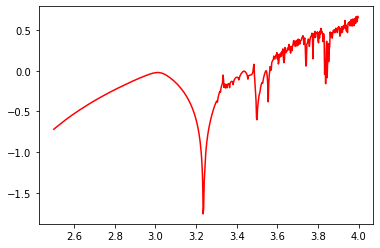

In [26]:
plt.plot(r, results, color = 'red')

In [27]:
m = 50 + 6 

In [28]:
x = np.linspace(0,1,m)

In [29]:
r = 3.6

In [30]:
results = np.zeros(m)

In [31]:
for i in range(m): 
    results[i] = LYP_X_R(x[i], r)

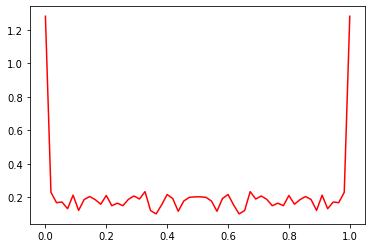

In [32]:
plt.plot(x, results, color = 'red')

## Завдання 6

In [33]:
def myFunc(x0, r):
    N = 46
    x = np.zeros(N)
    z = np.zeros(N)
    x[0] = x0 
    sum = 0
    for k in range(1, N):  
        x[k] = r*x[k-1]- pow(x[k-1], 2)
        z[k] = np.log(abs(r-2*r*x[k]))
        sum += z[k]
    return x, round(sum/N, 3)

In [34]:
(x, LYP) = myFunc(0.1, 0.9)
LYP

In [35]:
(x, LYP) = myFunc(0.1, 1.6)
LYP

In [36]:
(x, LYP) = myFunc(0.1, 2.9)
LYP

In [37]:
(x, LYP) = myFunc(0.1, 3.5)
LYP